# Common data sources, file formats and collection methods of data

### Tasks:
<table width="100%" height="90%">
    <tr>
        <td width="10%">
        <img src="https://img.icons8.com/plasticine/2x/task.png" alt="Tasks" width="100" height="100" align="left">
        </td>
        <td style="text-align: left">
        <font size="3"><b>Section 1: Common data sources:</b></font><br>
        <font size="3">1. Navigate to www.kaggle.com and look for a used cars data set. What's the content?</font><br>
        <font size="3">2. Download an SQLite-Database from www.kaggle.com. Can you make an SQL request on the DB?</font><br>
        <font size="3">3. Navigate to www.autoscout24.ch. Can you derive the xpath of car prices from the website?</font><br>
        <br>
        <font size="3"><b>Section 2: Common data formats:</b></font><br>
        <font size="3">1. Read the explanations about the different file-formats.</font><br>
        <font size="3">2. Create your own example-files for each file-format.</font><br>
        <font size="3">3. Read your example files and show header info of files in the Jupyter notebook.</font><br>
        <br>
        <font size="3"><b>Section 3: Common data collection methods</b></font><br>
        <font size="3">1. Find for each data collection method (e.g. direct download, RSS-feed, web scraping, ...) a suitable source.</font><br>
        <font size="3">2. Use Python code to read the data from the source.</font><br>
        <font size="3">3. Show the data in the Jupyter notebook.</font><br><br>
        </td>
    </tr>
</table>

## 1. Common data sources

### Files
A lot of open data platforms such as kaggle and opendata.swiss exists providing data which can be used for explanatory analysis and modeling ...

<table width="500" align="left">
    <tr>
        <td style="text-align: left">
        <img src="https://www.kaggle.com/static/images/site-logo.png">
        </td>
        <td style="text-align: left">
        <img src="https://opendata.swiss/images/logo_horizontal.png">
        </td>
        <td style="text-align: left">
        <img src="https://www.openstreetmap.org/assets/osm_logo-b7061f13a03615f787a7e0e56a0db5252eb2a217ab063183e78526a8cc10989b.svg">
        </td>
                <td style="text-align: left">
        <img src="https://data.worldbank.org/assets/images/logo-wb-header-en.svg">
        </td>
    </tr>
</table>

### Databases
Most data driven companies store their data in database management system. SQLite is a lightweight relational database management system (RDBMS). With python you can connect to a SQLite DB and make requests using SQL.

In [1]:
import sqlite3
import fnmatch
import pandas as pd

# Turn warnings off
import warnings
warnings.filterwarnings('ignore')

# Database connection (contains rental appartments in the canton of Zuerich)
conn = sqlite3.connect('apartment_database.db') 
cursor = conn.cursor()

# Show tables in the database
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])

# Query the SQL-table
cursor.execute('''SELECT * FROM apartments_table 
                  WHERE Rooms >= 3.0 
                  AND Price > 1500''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['OrderId','Rooms','Area','Price'])    
df

apartments_table


,OrderId,Rooms,Area,Price
0,1662023695-433,3.5,122.0,3180.0
1,1662023742-807,5.5,115.0,2860.0
2,1662023804-1290,3.5,74.0,2165.0
3,1662023739-771,5.5,195.0,6900.0
4,1662023686-384,3.0,75.0,3003.0
...,...,...,...,...
633,1662023730-697,3.0,68.0,1750.0
634,1662023714-580,3.0,64.0,2370.0
635,1662023749-858,5.5,123.0,2550.0
636,1662023783-1112,3.5,70.0,2190.0


### Websites
Websites can be manuelly searched for data or the search can be automated using python libraries ...

In [2]:
import requests
from bs4 import BeautifulSoup

# Request a websites content
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")

# Parsing the page content with BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

# Print the page content
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>



In [3]:
# XPath and CSS-selectors are helpful for the selection of text-elements from HTML-pages
# -> https://data-lessons.github.io/library-webscraping-DEPRECATED/04-lxml/
# -> https://www.freeformatter.com/xpath-tester.html

import requests
import lxml.html

# Example page from above
response = requests.get('http://dataquestio.github.io/web-scraping-pages/simple.html')
tree = lxml.html.fromstring(response.text)
title_elem = tree.xpath('//p')[0]
title_elem = tree.cssselect('p')[0]  # equivalent to previous XPath

print("tag:", title_elem.tag)
print("text:", title_elem.text_content())
print("html:", lxml.html.tostring(title_elem))
print("parent's tag:", title_elem.getparent().tag)

tag: p
text: Here is some simple content for this page.
html: b'<p>Here is some simple content for this page.</p>\n    '
parent's tag: body


## 2. Common data formats

<b>Data format in information technology may refer to:</b>

- Data type, constraint placed upon the interpretation of data in a type system
- Signal (electrical engineering), a format for signal data used in signal processing
- Recording format, a format for encoding data for storage on a storage medium
- <b style="color:yellowgreen">File format, a format for encoding data for storage in a computer file</b>
- Container format (digital), a format for encoding data for storage by means of a standardized audio/video codecs file format
- Content format, a format for representing media content as data
- Audio format, a format for encoded sound data
- Video format, a format for encoded video data

Wikipedia: https://en.wikipedia.org/wiki/Data_format

This section provides common <b style="color:yellowgreen">file formats</b> a data scientist or a data engineer must be aware of. Later, we’ll see how to read these file formats in Python.

List with common file formats explained in this notebook:
- CSV
- TXT
- JSON
- XML
- HTML
- ZIP
- XLSX
- PDF
- Image files (e.g. JPEG)

In [4]:
# Files can be saved in the current or in a user defined working directory
import os

# get current working directory
os.getcwd()

# set working directory (if required)
# os.chdir("C:/path_to_your_folder")

'/workspaces/ZHAW-Data-Science-Fundamentals/Week3'

### CSV (comma separated value)

- A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. 
- Each line of the file is a data record 
- Each record consists of one or more fields, separated by a comma
- The use of the comma as a field separator is the source of the name for this file format
- A CSV file typically stores tabular data (numbers and text) in plain text

In [5]:
import pandas as pd

# Read data from your prepared example .csv-file (define seperator)
data = pd.read_csv("example.csv", sep=";", encoding='utf-8')

# Print the header info of data (first five rows)
data.head(5)

,Var1,Var2
0,1,text1
1,2,text2
2,3,text3
3,4,text4
4,5,text5


### TXT (plain text)

- In Plain Text file format, everything is written in plain text
- Usually, this text is in unstructured form and there is no meta-data associated with it
- The TXT file format can easily be read by any program

In [6]:
import pandas as pd

# Read data from our prepared example .txt file
text_file = open("example.txt", "r")
lines     = text_file.read()

# Show class type
print(type(lines))

# Print the data 
print(lines)
print(lines[:18])

<class 'str'>
Hallo, wie geht's heute so?

Hallo, wie geht's 


### JSON (javascript object notation)

- JSON is a syntax for storing and exchanging data
- JSON is text, written with JavaScript object notation

In [7]:
import pandas as pd

# Read data from your prepared example .json-file (look at w3schools.com for examples)
data = pd.read_json("example.json")

# Print the data 
print(data)

              firstName lastName  age        address
city               John    Smith   27       New York
postalCode         John    Smith   27     10021-3100
state              John    Smith   27             NY
streetAddress      John    Smith   27  21 2nd Street


### XML (extensible markup language)

- XML stands for extensible Markup Language
- XML is a markup language much like HTML
- XML was designed to store and transport data
- XML was designed to be self-descriptive
- XML is a W3C Recommendation

In [8]:
from bs4 import BeautifulSoup

bs = BeautifulSoup(open('example.xml'), 'html.parser')
print(bs.prettify())

<?xml version="1.0" encoding="UTF-8"?>
<breakfast_menu>
 <food>
  <name>
   Belgian Waffles
  </name>
  <price>
   $5.95
  </price>
  <description>
   Two of our famous Belgian Waffles with plenty of real maple syrup
  </description>
  <calories>
   650
  </calories>
 </food>
</breakfast_menu>



### HTML (hyper text markup language)

- HTML stands for Hyper Text Markup Language
- HTML is the standard markup language for creating Web pages
- HTML describes the structure of a Web page
- HTML consists of a series of elements
- HTML elements tell the browser how to display the content
- HTML elements label pieces of content such as "this is a heading", "this is a paragraph", "this is a link", etc.

In [9]:
filename = 'example.html'
f = open(filename, "r").read()
print(f)

<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body><h1>My First Heading</h1>
<p>My first paragraph.</p></body>
</html>


### ZIP (archive file format)

- ZIP is an archive file format that supports lossless data compression
- A ZIP file may contain one or more files or directories that may have been compressed
- The ZIP file format permits a number of compression algorithms, though DEFLATE is the most common
- The name "zip" (meaning "move at high speed") was suggested by R. Mahoney
- They wanted to imply that their product would be faster than ARC and other compression formats of the time

In [10]:
import pandas as pd

# Pandas supports zip file reads (define separator via the sep="" command)
data = pd.read_csv("archive.zip", sep=";")
data.head(5)

,Var1,Var2
0,1,text1
1,2,text2
2,3,text3
3,4,text4
4,5,text5


### XLSX (Microsoft Excel Open XML file format)

- It is an XML-based file format created by Microsoft Excel 
- The XLSX format was introduced with Microsoft Office 2007
- In XLSX data is organized under the cells and columns in a sheet
- Each XLSX file may contain one or more sheets
- A single workbook can contain multiple sheets

In [11]:
import pandas as pd

# Read data from an example .xlsx-file (define the sheetname)
data = pd.read_excel("example.xlsx", sheet_name = "sheet1")

# Print the data 
data.head(5)

,Var1,Var2
0,1,text1
1,2,text2
2,3,text3
3,4,text4
4,5,text5


### PDF (portable document format)

- PDF is a file format developed by Adobe in the 1990s to present documents, including text formatting and images, in a manner independent of application software, hardware, and operating systems
- Based on the PostScript language, each PDF file encapsulates a complete description of a fixed-layout flat document, including the text, fonts, vector graphics, raster images and other information needed to display it

In [12]:
import PyPDF2

# PDF -> Python-object
pdfFileObj = open('example.pdf', 'rb')
pdfReader  = PyPDF2.PdfReader(pdfFileObj)

# Show number of pages
print("Number of pages in pdf-document:", len(pdfReader.pages))

# Extract and print text from the first page
pageObj = pdfReader.pages[0]
a       = pageObj.extract_text()
print("-------------------------------------")
print("Text from pdf-document:", "\n")
print(a[:23])

Number of pages in pdf-document: 1
-------------------------------------
Text from pdf-document: 

Hallo, das ist ein PDF 


### Image file formats

- Image files consists of pixels and meta-data associated with it
- Usual image files are 3-dimensional, having RGB values
- Image files can also be 2-dimensional (grayscale) or 4-dimensional (having intensity)
- Each image consists one or more frames of pixels
- Each frame is made up of two-dimensional array of pixel values
- Pixel values can be of any intensity 
- Meta-data associated with an image, can be an image type (.png) or pixel dimensions
- The different formats (JPEG, PNG, TIFF, GIF, ...) are used to organize and store digital images in a different way

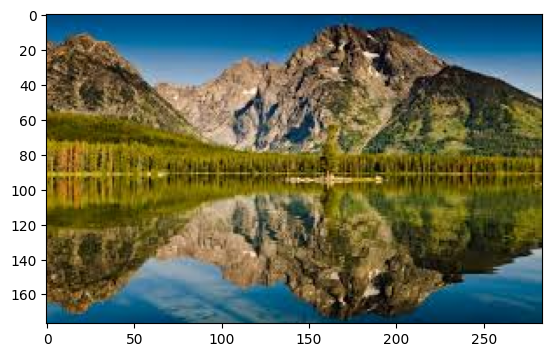

In [13]:
import matplotlib.pyplot as plt

image = plt.imread('example.jpeg')
plt.imshow(image)

## 3.) Common data collection methods

### Direct download

Direct download link (DDL), alternatively simply direct download, is a term used within the Internet-based file sharing community. It is used to describe a hyperlink that points to a location within the Internet where the user can download a file. When used in conversation, DDL distinguishes itself from other forms of peer-to-peer (P2P) downloading architectures in that it uses a client–server architecture, where 100-percent of the file is stored on a single file server or in parallel across multiple file servers in a server farm.

Wikipedia: https://en.wikipedia.org/wiki/Direct_download_link

In [14]:
# Example DDL of a .zip-file from geoadmin containing all tram and bus stops and stations in Switzerland
import zipfile, urllib.request, shutil

url = 'https://data.geo.admin.ch/ch.bakom.mobil-antennenstandorte-lte/data.zip'
file_name = 'LTE_Antennas_Switzerland.zip'

with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    
# Unzip the data in the working directory
with zipfile.ZipFile(file_name) as zf:
    zf.extractall()

# ---> look for the file in your working directory

### Web-APIs

A Web API is an application programming interface for either a web server or a web browser. It is a web development concept, usually limited to a web application's client-side (including any web frameworks being used), and thus usually does not include web server or browser implementation details such as SAPIs or APIs unless publicly accessible by a remote web application.

Wikipedia: https://en.wikipedia.org/wiki/Web_API

Id: 269234988 Name: Drechslerstübli
Id: 309162302 Name: Pointe du Grain
Id: 331943288 Name: La Chotte des Grands Plans
Id: 339200272 Name: Buvette du Petit Pré
Id: 339200278 Name: tsantonnaire


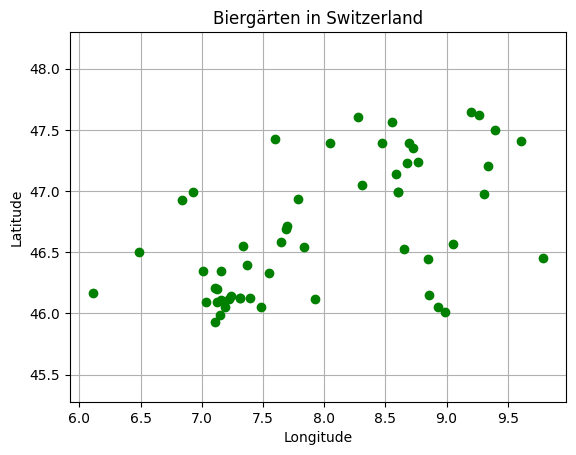

In [15]:
# Example -> OpenStreetMap (OSM) Web-API
import json
import requests
import numpy as np
import matplotlib.pyplot as plt

# Request all places marked as 'biergarten" in Switzerland
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """[out:json];
                     area["ISO3166-1"="CH"][admin_level=2];
                    node["amenity"="biergarten"](area);
                    out center;"""

# Server response
response = requests.get(overpass_url, 
                        params={'data': overpass_query})

data = response.json()

# Show the first 'biergärten' in the data
for i in range(5):
    print("Id:",data['elements'][i]['id'], "Name:", data["elements"][i]["tags"]["name"])

# Plot the places
# Collect coords into list
coords = []
for element in data['elements']:
    if element['type'] == 'node':
        lon = element['lon']
        lat = element['lat']
        coords.append((lon, lat))
    elif 'center' in element:
        lon = element['center']['lon']
        lat = element['center']['lat']
        coords.append((lon, lat))

# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o', color="green")
plt.title('Biergärten in Switzerland')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.grid()
plt.show()

### RSS-Feeds

RSS (Really Simple Syndication) is a web feed that allows users and applications to access updates to websites in a standardized, computer-readable format.

Wikipedia: https://en.wikipedia.org/wiki/RSS

In [16]:
import feedparser
import webbrowser

# rss feeds from NZZ website
feed = feedparser.parse("https://www.nzz.ch/startseite.rss")

# feed_title = feed['feed']['title']  # NOT VALID
feed_entries = feed.entries

# show first RSS-feeds
for entry in feed.entries[0:10]:

    article_title = entry.title
    article_link = entry.link
    article_published_at = entry.published # Unicode string
    article_published_at_parsed = entry.published_parsed # Time object

    # Change and format output
    print ("{}".format(article_title))
    # print ("{}[{}]".format(article_title, article_link))
    # print ("Published at {}".format(article_published_at))

INTERVIEW - SVP-Politikerin engagiert Rechtsextreme: «Man kann mir Naivität vorwerfen, aber für Dummheit kann ich ja nicht belangt werden»
Buurezmorge mit der Jungen Tat: Wie die SVP in den Dunstkreis einer rechtsextremen Gruppierung geraten ist
Der Angriff einer kriminellen serbischen Miliz in Kosovo wirft Fragen auf: Führt die Spur nach Belgrad?
Als ich einmal in Not war, regnete es aus einer Bibel Dollarscheine auf mich herab – ein Essay des Schriftstellers Thomas Hürlimann
Kommt jetzt der Super-«Blick»? Ringier wird alleinige Besitzerin von 20 Magazin- und Zeitungstiteln
INTERVIEW - «Wenn es normal läuft, müsste es irgendwann in einem Bundesland eine CDU-Minderheitsregierung geben, die sich von Zeit zu Zeit auf Stimmen von uns stützt»
Die Krankenkassenprämien explodieren – doch bei der Inflation sieht man nichts
«Niemand im Gesundheitswesen hat wirklich ein Interesse an tieferen Kosten» – der Mitte-Chef Pfister kritisiert Ärzte, Krankenkassen und Parteikollegen
So spart man Geld be

### Web Scraping

Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. Web scraping software may access the World Wide Web directly using the Hypertext Transfer Protocol, or through a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying, in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis.

Wikipedia: https://en.wikipedia.org/wiki/Web_scraping

In [17]:
import requests
import numpy as np
from bs4 import BeautifulSoup

# Download the page
page = requests.get("https://www.schweizerbauern.ch")

# Parsing a page with BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

# Iterator
def createList(r1, r2): 
    return np.arange(r1, r2+1, 3)
r1, r2 = 3, 10
list_base_infos = createList(r1, r2)

# Deriving infos from <p> tags
print("Text from https://www.schweizerbauern.ch")
print("------------------------------------------------------------------")
for i in list_base_infos:
    print(soup.find_all('p')[i+1].get_text(), soup.find_all('p')[i].get_text())


Text from https://www.schweizerbauern.ch
------------------------------------------------------------------
Der Genuss aus der Region, gleich um die Ecke vom Bauernhof zu dir nach Hause. Wo findest du den nächsten Bauernhof mit regionalen Angeboten? Bei der Hofsuche bist du genau richtig und findest genau deine Produkte direkt in deiner Nähe.
Du planst einen Ausflug mit deiner Familie in die Natur? Du möchtest was Besonderes erleben? Eine Stallvisite auf dem Bauernhof bietet dir ein unvergessliches Erlebnis. Erdbeeren, Tomaten oder Milch aus der Region? Frische Produkte findest du im Hofladen in deiner Nähe. Doch unsere Bauernfamilien bieten viel mehr als nur Gemüse oder Fleisch ab Hof: Einen Apéro in der Besenbeiz, Schlafen im Stroh oder ein Trekking mit Tieren – auf Schweizer Bauernhöfen kannst du einiges erleben.
Hast du Knack wie die Karotte? Finde heraus welches Gemüse du bist! Auf dem Bauernhof arbeiten ist echt anstrengend. Eli Simic besucht Schweizer Bäuerinnen & Bauern und hil

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [18]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 5.15.0-1041-azure
Datetime: 2023-09-27 17:56:00
Python Version: 3.11.5
-----------------------------------
